In [1]:
!pip install ultralytics
from ultralytics import YOLO



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
from ultralytics import YOLO

# base model
model_path = "/content/drive/MyDrive/yolo11m.pt"
data_path = "/content/datasetCustom.yaml"

# each dict = 1 experiment
experiments = [
    {
        "name": "exp_baseline",
        # almost no aug
        "degrees": 0.0,
        "translate": 0.0,
        "scale": 0.0,
        "fliplr": 0.0,
        "hsv_h": 0.0,
        "hsv_s": 0.0,
        "hsv_v": 0.0,
    },
    {
        "name": "exp_geo_mild",

        "degrees": 10.0,
        "translate": 0.05,
        "scale": 0.10,
        "fliplr": 0.5,
        "hsv_h": 0.015,
        "hsv_s": 0.5,
        "hsv_v": 0.4,
    },
    {
        "name": "exp_geo_stronger",

        "degrees": 15.0,
        "translate": 0.10,
        "scale": 0.15,
        "fliplr": 0.5,
        "hsv_h": 0.015,
        "hsv_s": 0.5,
        "hsv_v": 0.4,
    },
    {
        "name": "exp_color_heavy",

        "degrees": 5.0,
        "translate": 0.03,
        "scale": 0.08,
        "fliplr": 0.5,
        "hsv_h": 0.03,
        "hsv_s": 0.7,
        "hsv_v": 0.6,
    },
]


In [3]:
for cfg in experiments:
    print(f"\n=== Training {cfg['name']} ===")
    model = YOLO(model_path)
    model.train(
        data=data_path,
        epochs=100,
        imgsz=512,
        project="/content/runs",
        name=cfg["name"],
        degrees=cfg["degrees"],
        translate=cfg["translate"],
        scale=cfg["scale"],
        fliplr=cfg["fliplr"],
        hsv_h=cfg["hsv_h"],
        hsv_s=cfg["hsv_s"],
        hsv_v=cfg["hsv_v"],
        patience=30,
    )



=== Training exp_baseline ===
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasetCustom.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_m

In [5]:
import pandas as pd
from pathlib import Path

run_root = Path("/content/runs")
exp_names = [e["name"] for e in experiments]

rows = []
for name in exp_names:
    csv_path = run_root / name / "results.csv"
    if not csv_path.exists():
        print(f"[warn] {csv_path} not found")
        continue
    df = pd.read_csv(csv_path)
    last = df.iloc[-1].to_dict()
    last["exp_name"] = name
    rows.append(last)

summary = pd.DataFrame(rows)
# show only key cols
cols = ["exp_name", "metrics/mAP50(B)", "metrics/mAP50-95(B)", "metrics/precision(B)", "metrics/recall(B)"]
print(summary[cols])


           exp_name  metrics/mAP50(B)  metrics/mAP50-95(B)  \
0      exp_baseline           0.34744              0.16634   
1      exp_geo_mild           0.48090              0.20443   
2  exp_geo_stronger           0.30157              0.12428   
3   exp_color_heavy           0.36932              0.15238   

   metrics/precision(B)  metrics/recall(B)  
0               0.82052            0.30035  
1               0.57252            0.37154  
2               0.60925            0.31759  
3               0.72967            0.32719  


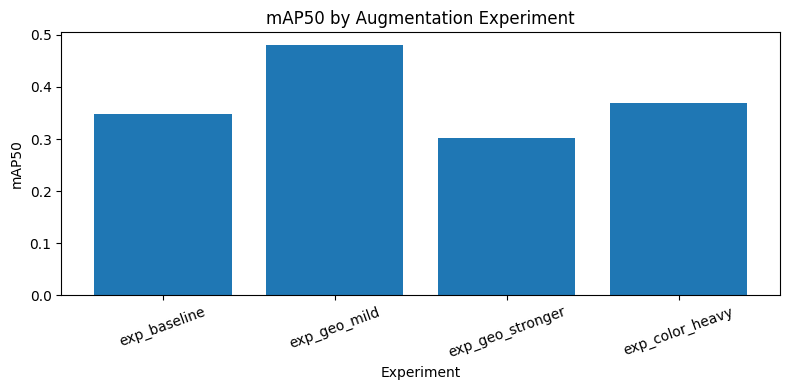

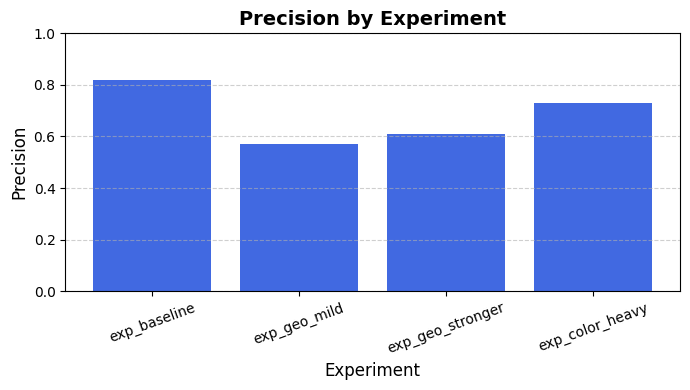

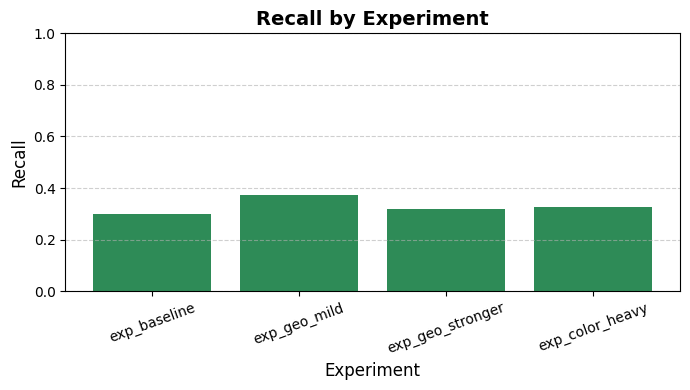

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# your data
data = {
    "exp_name": [
        "exp_baseline",
        "exp_geo_mild",
        "exp_geo_stronger",
        "exp_color_heavy",
    ],
    "mAP50": [0.34744, 0.48090, 0.30157, 0.36932],
    "mAP50_95": [0.16634, 0.20443, 0.12428, 0.15238],
    "precision": [0.82052, 0.57252, 0.60925, 0.72967],
    "recall": [0.30035, 0.37154, 0.31759, 0.32719],
}

df = pd.DataFrame(data)


plt.figure(figsize=(8, 4))
plt.bar(df["exp_name"], df["mAP50"])
plt.title("mAP50 by Augmentation Experiment")
plt.xlabel("Experiment")
plt.ylabel("mAP50")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


plt.figure(figsize=(7, 4))
plt.bar(df["exp_name"], df["precision"], color="royalblue")
plt.title("Precision by Experiment", fontsize=14, weight="bold")
plt.xlabel("Experiment", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---- Recall graph ----
plt.figure(figsize=(7, 4))
plt.bar(df["exp_name"], df["recall"], color="seagreen")
plt.title("Recall by Experiment", fontsize=14, weight="bold")
plt.xlabel("Experiment", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
!yolo detect predict \
    model=/content/runs/yolo11m_aug/weights/best.pt \
    source=/content/drive/MyDrive/split/test/images \
    imgsz=512 \
    conf=0.25 \
    iou=0.6 \
    device=0 \
    save=True \
    project=/content/runs \
    name=predict_test_aug

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,042,368 parameters, 0 gradients, 67.7 GFLOPs

image 1/20 /content/drive/MyDrive/split/test/images/BirdCatcherTree(1)(7).jpeg: 512x384 (no detections), 49.2ms
image 2/20 /content/drive/MyDrive/split/test/images/BirdCatcherTree(1)(9).jpeg: 512x384 1 BirdCatcherTree, 21.9ms
image 3/20 /content/drive/MyDrive/split/test/images/CapeDaisy(1)(2).jpeg: 512x384 (no detections), 21.9ms
image 4/20 /content/drive/MyDrive/split/test/images/CastIronPlant(1)(3).jpeg: 512x384 (no detections), 21.9ms
image 5/20 /content/drive/MyDrive/split/test/images/FairyPritmose(1)(3).jpeg: 512x384 (no detections), 21.9ms
image 6/20 /content/drive/MyDrive/split/test/images/FairyStoneCorp(2)(1).jpeg: 512x384 (no detections), 21.9ms
image 7/20 /content/drive/MyDrive/split/test/images/FairyStoneCorp(2)(3).jpeg: 512x384 (no detections), 21.9ms
image 8/20 /content/drive/MyDrive/split/test/images/Farmo

In [ ]:
!yolo detect val model=/content/runs/yolo11m_aug/weights/best.pt data=/content/datasetCustom.yaml

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/yolo11m.pt')

model.train(
    data='/content/datasetCustom.yaml',
    epochs=100,
    imgsz=512,
    project='/content/runs',
    name='yolo11m_aug',
    # ---- geometric (kept mild to preserve stems) ----
    degrees=10.0,          # ±10°
    translate=0.05,        # up to 5% shift
    scale=0.10,            # ±10% zoom
    fliplr=0.5,            # left-right flip
    # ---- photometric ----
    hsv_h=0.015,
    hsv_s=0.5,
    hsv_v=0.4,
    # ---- regularization ----
    patience=30,
)


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasetCustom.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11m_aug, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796d5c1dbf20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [ ]:

!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/datasetCustom.yaml


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,042,368 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 129.3±21.7 MB/s, size: 334.7 KB)
val: Scanning /content/drive/MyDrive/split/val/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 35/35 641.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.5it/s 2.1s
                   all         35         43      0.732      0.355      0.395      0.193
       BirdCatcherTree          1          3          1          0      0.128     0.0555
             CapeDaisy          3          5          1          0      0.209     0.0499
         CastIronPlant          1          1          1          0      0.111     0.0263
         FairyPritmose          1          1          1          0          0          0
        FairyStoneCorp          3      

In [ ]:
!yolo detect train data=/content/datasetCustom.yaml model=/content/drive/MyDrive/yolo11m.pt epochs=150 imgsz=512

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasetCustom.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=

In [ ]:
!yolo detect predict \
    model=/content/runs/detect/train/weights/best.pt \
    source=/content/drive/MyDrive/split/test/images \
    imgsz=512 \
    conf=0.25 \
    iou=0.6 \
    device=0 \
    save=True \
    project=/content/runs \
    name=predict_test


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,042,368 parameters, 0 gradients, 67.7 GFLOPs

image 1/20 /content/drive/MyDrive/split/test/images/BirdCatcherTree(1)(7).jpeg: 512x384 (no detections), 50.6ms
image 2/20 /content/drive/MyDrive/split/test/images/BirdCatcherTree(1)(9).jpeg: 512x384 (no detections), 22.0ms
image 3/20 /content/drive/MyDrive/split/test/images/CapeDaisy(1)(2).jpeg: 512x384 1 CapeDaisy, 22.5ms
image 4/20 /content/drive/MyDrive/split/test/images/CastIronPlant(1)(3).jpeg: 512x384 (no detections), 22.0ms
image 5/20 /content/drive/MyDrive/split/test/images/FairyPritmose(1)(3).jpeg: 512x384 2 FairyPritmoses, 22.0ms
image 6/20 /content/drive/MyDrive/split/test/images/FairyStoneCorp(2)(1).jpeg: 512x384 (no detections), 21.9ms
image 7/20 /content/drive/MyDrive/split/test/images/FairyStoneCorp(2)(3).jpeg: 512x384 (no detections), 21.9ms
image 8/20 /content/drive/MyDrive/split/test/images/FarmosaLil